### Web Scraping Project - Rent the Runway

#### 1. Import Library


In [3]:
# import library
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import sklearn
import chart_studio.plotly as py
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import scipy.stats

#### 2. Import Data


In [86]:
# read csv data and save it as dataframes
rent = pd.read_csv('renttherunway_final.csv', header = 0)
rent_reviews = pd.read_csv('renttherunway_reviews.csv', header = 0)
saks = pd.read_csv('saks.csv', header = 0)

In [261]:
lounge = pd.read_csv('lounge_wear.csv', header = 0)

In [253]:
lounge.head(5)

,Unnamed: 0,brand,name,original_price,price,num_reviews,username,review_title,reviews,category,category_lounge
0,1,Tibi,Asymmetrical Ruffle Blouse,495,85,19.0,NaN,NaN,It's hard to see how rich and gorgeous this co...,Tops,Other
1,2,Joie,Dicra Pants,248,40,14.0,NaN,NaN,A bit tight on hips and thighs but perfect len...,Bottoms,Other
2,3,Terez,Reflective Stripe Legging,120,30,4.0,NaN,NaN,NaN,Bottoms,loungewear
3,4,Cedric Charlier,Orange Knit Sweater,595,100,32.0,NaN,NaN,NaN,Sweater,Other
4,5,Diane von Furstenberg,Mariah Top,268,45,46.0,NaN,NaN,I wore this to work and loved it. It fit perfe...,Tops,Other


In [87]:
rent.head(5)

,,brand,name,original_price,price,num_reviews,username,review_title,reviews,category
0,1123,MONSE,Multi Tartan Pleated Trench Coat,2590,390,1.0,NaN,NaN,NaN,Outerwear
1,2140,KAUFMANFRANCO,Purple Print Halter Maxi,1995,325,56.0,NaN,Gorgeous material,It was overly large and too big. \nEither a sm...,Dresses
2,2201,KAUFMANFRANCO,Violet Halter Maxi,1995,325,28.0,NaN,Beautiful color and dress,NaN,Dresses
3,2712,Rochas,Pink Tie Neck Dress,1800,305,4.0,NaN,So fun!,Fabric and color are gorgeous but there's no s...,Dresses
4,1840,Missoni,Rilievo Sleeveless Dress,1770,300,13.0,NaN,Size up!!,This dress fits TTS and is incredibly comforta...,Dresses


In [34]:
saks.head(5)

,Unnamed: 0,brand_name,product_name,category,original_price
0,1,Roller Rabbit,Semara Floral Tunic Dress,dresses,148
1,2,Rebecca Taylor,Talita Short-Sleeve Dress,dresses,250
2,3,Trina Turk,Gardenia Striped Knit Dress,dresses,248
3,4,Eileen Fisher,Roundneck Ribbed Tunic Dress,dresses,178
4,5,Eileen Fisher,Textured Crepe Dress,dresses,218


#### 3. Data Cleaning

In [ ]:
rent.assign( = lambda dataframe: dataframe['age'].map(lambda age: True if age >= 65 else False) 

Text(0.5, 1, 'Saks Fifth Avenue Missing Data')

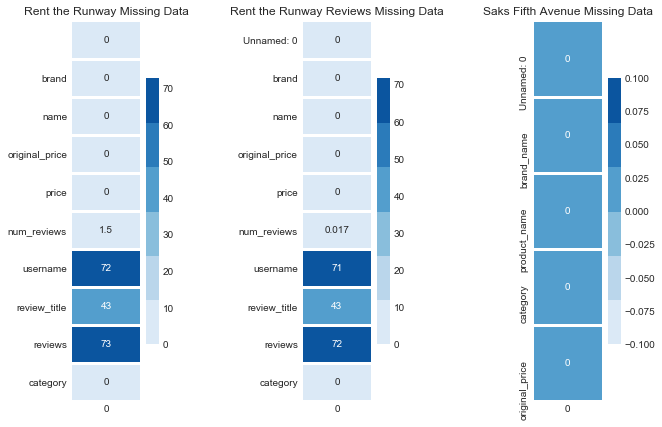

In [88]:
from IPython.display import display, HTML
# Look at missing data

# Set theme
cm = sns.light_palette("green",as_cmap=True)
plt.figure(figsize=(14,7))


# Rent the Runway missing data
plt.subplot(1,4,1)
sns.heatmap(pd.DataFrame(rent.isnull().sum()/rent.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("Rent the Runway Missing Data")


# Rent the Runway Reviews missing data
plt.subplot(1,4,2)
sns.heatmap(pd.DataFrame(rent_reviews.isnull().sum()/rent_reviews.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("Rent the Runway Reviews Missing Data")


# Saks Fifth Avenue missing data
plt.subplot(1,4,3)
sns.heatmap(pd.DataFrame(saks.isnull().sum()/saks.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.subplots_adjust(wspace = 1.6)
plt.title("Saks Fifth Avenue Missing Data")

# The Real Real missing data



In [89]:
# Drop NA values in category
rent['category'] = rent['category'].dropna(axis = 0)
rent_reviews['category'] = rent_reviews['category'].dropna(axis = 0)

# Convert NA values to 0 in num_reviews
rent['num_reviews'] = rent['num_reviews'].replace(np.nan, 0)
rent_reviews['num_reviews'] = rent_reviews['num_reviews'].replace(np.nan, 0)

In [37]:
# Covert data types

# Check data type
print(rent.dtypes)
print(saks.dtypes)

Unnamed: 0          int64
brand              object
name               object
original_price      int64
price               int64
num_reviews       float64
mem_price           int64
review_title       object
reviews            object
username           object
rented_for         object
category           object
dtype: object
Unnamed: 0         int64
brand_name        object
product_name      object
category          object
original_price     int64
dtype: object


In [104]:
# Create a new column
rent = rent.assign(
    rental_price_rate = lambda rent: round((rent['price'] / rent['original_price']) * 100, 2)
)

In [105]:
rent.head(5)

,,brand,name,original_price,price,num_reviews,username,review_title,reviews,category,rental_price_rate
0,1123,MONSE,Multi Tartan Pleated Trench Coat,2590,390,1.0,NaN,NaN,NaN,Outerwear,15.06
1,2140,KAUFMANFRANCO,Purple Print Halter Maxi,1995,325,56.0,NaN,Gorgeous material,It was overly large and too big. \nEither a sm...,Dresses,16.29
2,2201,KAUFMANFRANCO,Violet Halter Maxi,1995,325,28.0,NaN,Beautiful color and dress,NaN,Dresses,16.29
3,2712,Rochas,Pink Tie Neck Dress,1800,305,4.0,NaN,So fun!,Fabric and color are gorgeous but there's no s...,Dresses,16.94
4,1840,Missoni,Rilievo Sleeveless Dress,1770,300,13.0,NaN,Size up!!,This dress fits TTS and is incredibly comforta...,Dresses,16.95


#### 4. EDA

In [149]:
# Average price by category
group = rent.groupby('category')
cat_mean=group[['price']].mean().reset_index()
cat_mean

,category,price
0,Bottoms,45.360360
1,Dresses,65.923801
2,Jumpsuits & Rompers,46.826923
3,Maternity,36.035354
4,Outerwear,76.112853
5,Sweater,53.201058
6,Tops,51.288580


In [91]:
# Average original retail price by category
group = rent.groupby('category')
group[['original_price']].mean().reset_index()

,original_price
category,
Bottoms,240.301802
Dresses,411.402634
Jumpsuits & Rompers,253.836538
Maternity,193.010101
Outerwear,441.736677
Sweater,286.328042
Tops,276.418210


In [266]:
# Average review number by category
group = rent.groupby('category')
brand_pop2 = group[['num_reviews']].mean().reset_index()
brand_pop2

,category,num_reviews
0,Bottoms,23.621622
1,Dresses,104.352775
2,Jumpsuits & Rompers,33.557692
3,Maternity,18.247475
4,Outerwear,25.235110
5,Sweater,30.185185
6,Tops,27.125000


In [225]:
# Top 15 Popular Brands in terms of review number
group = rent.groupby('brand')
num_reviews_df = group[['num_reviews']].mean()
brand_num_reviews = num_reviews_df.sort_values(by=['num_reviews'], 
                                               ascending=False).nlargest(15,['num_reviews']).reset_index()
brand_num_reviews

,brand,num_reviews
0,Badgley Mischka,499.914894
1,Dress The Population,373.800000
2,LM Collection,253.000000
3,Aidan Mattox,231.000000
4,ST by Olcay Gulsen,230.000000
5,Nicole Miller,214.113636
6,La Petite Robe di Chiara Boni,194.923077
7,David Meister,154.000000
8,twenty,140.500000
9,Theia,122.333333


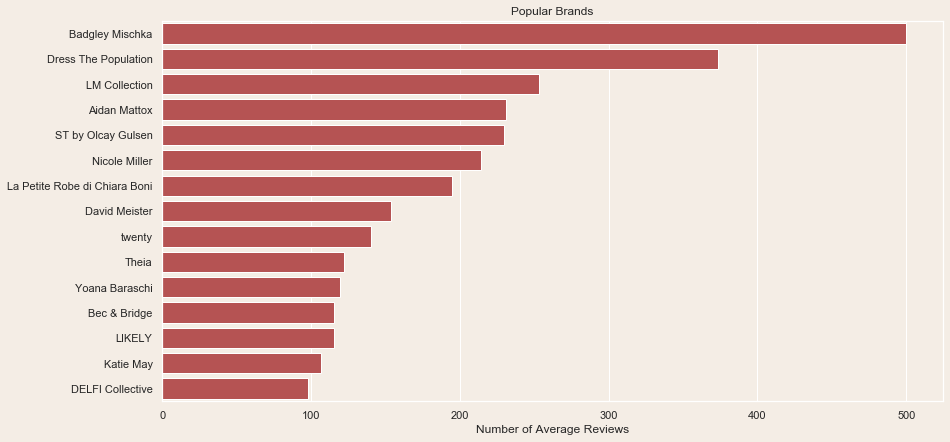

In [247]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
fig = plt.figure(figsize = (14, 7))
sns.barplot(x = 'num_reviews', y='brand', data = brand_num_reviews,
            color = '#c64242').set_title("Popular Brands")
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Number of Average Reviews')
plt.ylabel('')
sns.set_style()

In [250]:
# Most Popular Product
rent_popular = rent.sort_values(by=['num_reviews'], ascending=False).nlargest(15,['num_reviews']).reset_index()
rent_popular

,index,,brand,name,original_price,price,num_reviews,username,review_title,reviews,category,rental_price_rate
0,238,1635,Badgley Mischka,Fifth Avenue Showstopper Dress,750,30,4461.0,NaN,Vegas getaway!,"Fit was great! Not too snug, was able to move ...",Dresses,4.00
1,929,2534,Badgley Mischka,Award Winner Gown,620,70,4047.0,NaN,Truly a gorgeous gown!,This was a VERY comfortable dress. I am all a...,Dresses,11.29
2,74,2285,Nicole Miller,Tempted by You Gown,995,75,3350.0,NaN,NaN,NaN,Dresses,7.54
3,581,2454,Badgley Mischka,Glitz Gown,650,90,2828.0,NaN,"Great, sparkly plus size option!",NaN,Dresses,13.85
4,136,2738,Badgley Mischka,Corundum Sapphire Gown,790,55,2022.0,NaN,NaN,NaN,Dresses,6.96
5,132,2404,Badgley Mischka,Ruby Red Gala Gown,740,55,1847.0,NaN,This dress is what dreams are made of,The dress fits very comfortably with a nice ci...,Dresses,7.43
6,135,2730,Badgley Mischka,Flora Chiffon Gown,850,55,1711.0,NaN,NaN,NaN,Dresses,6.47
7,572,1746,Nicole Miller,Midnight Sequin Stars Gown,650,90,1584.0,NaN,Great Bridesmaid Dress,NaN,Dresses,13.85
8,1829,2203,Badgley Mischka,Midnight Glamour Dress,395,35,1555.0,RTR Customer,Gorgeous Blue!,NaN,Dresses,8.86
9,119,1742,Badgley Mischka,Forbidden Territory Gown,935,55,1412.0,NaN,Perfect formal black dress for winter!,I really enjoyed this dress for a gala event. ...,Dresses,5.88


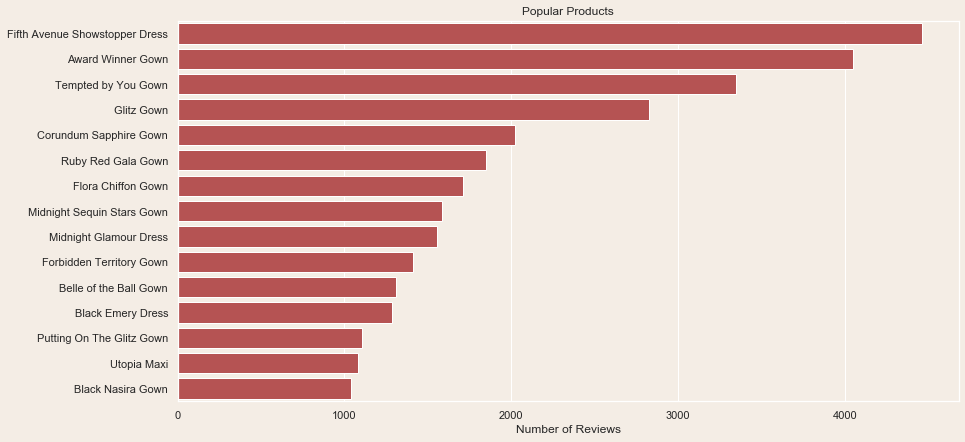

In [281]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
fig = plt.figure(figsize = (14, 7))
sns.barplot(x = 'num_reviews', y='name', data = rent_popular,
            color = '#c64242').set_title("Popular Products")
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Number of Reviews')
plt.ylabel('')
sns.set_style()

In [122]:
# Top 10 Brands in terms of price
group = rent.groupby('brand')
brand_price_df = group[['price']].mean()
brand_price_df.sort_values(by=['price'], ascending=False).nlargest(10,['price']).reset_index()

,price
brand,
Veronique Branquinho,275.000000
MONSE,261.666667
KAUFMANFRANCO,243.000000
Missoni,234.000000
Nina Ricci,230.000000
NAEEM KHAN,225.000000
CAROLINE CONSTAS,220.000000
Rokh,200.000000
Esteban Cortazar,200.000000


In [156]:
group = rent.groupby('brand')
rent_price_rate_brand_df = group[['rental_price_rate']].mean()
rent_price_rate_brand_df.sort_values(by=['rental_price_rate'], ascending=False).nlargest(10,['rental_price_rate']).reset_index()

,brand,rental_price_rate
0,FILA,63.335000
1,Jason Wu x ELOQUII,50.000000
2,GeBe Maternity,49.233333
3,LEE,44.120000
4,City Chic,43.616667
5,B Collection by Bobeau,41.758636
6,ELOQUII,41.640714
7,LOST INK,41.320000
8,DAYDREAMER,40.000000
9,JUNAROSE,39.118667


In [158]:
group = rent.groupby('category')
rent_price_rate_cat_df = group[['rental_price_rate']].mean()
rent_price_rate_cat_df = rent_price_rate_cat_df.sort_values(by=['rental_price_rate'], 
                                   ascending=False).nlargest(10,['rental_price_rate']).reset_index()
rent_price_rate_cat_df

#### 5. Data Visualization

In [254]:
# Rent the Runway Membership Plan
rent_plan = pd.DataFrame({'plan': ['4/month', '8/month', '16/month'],\
                            'price':[89, 135, 199],\
                           'shipment_per_month':[1, 2, 4],\
                            'access':['basic closet', 'full closet', 'full closet']})
rent_plan

,plan,price,shipment_per_month,access
0,4/month,89,1,basic closet
1,8/month,135,2,full closet
2,16/month,199,4,full closet


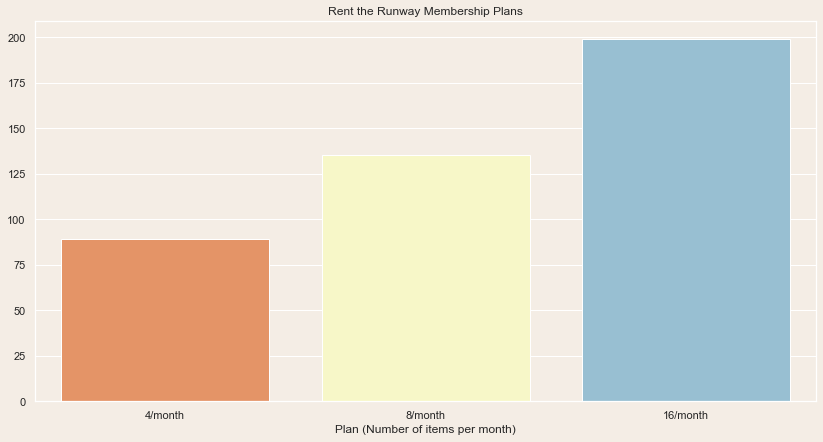

In [255]:
# color theme: #f4ede5 (for background)

sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
fig = plt.figure(figsize = (14, 7))
sns.barplot(x = 'plan', y='price', data = rent_plan,
            palette = 'RdYlBu').set_title("Rent the Runway Membership Plans")
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Plan (Number of items per month)')
plt.ylabel('')
sns.set_style()

Text(0, 0.5, 'Density')

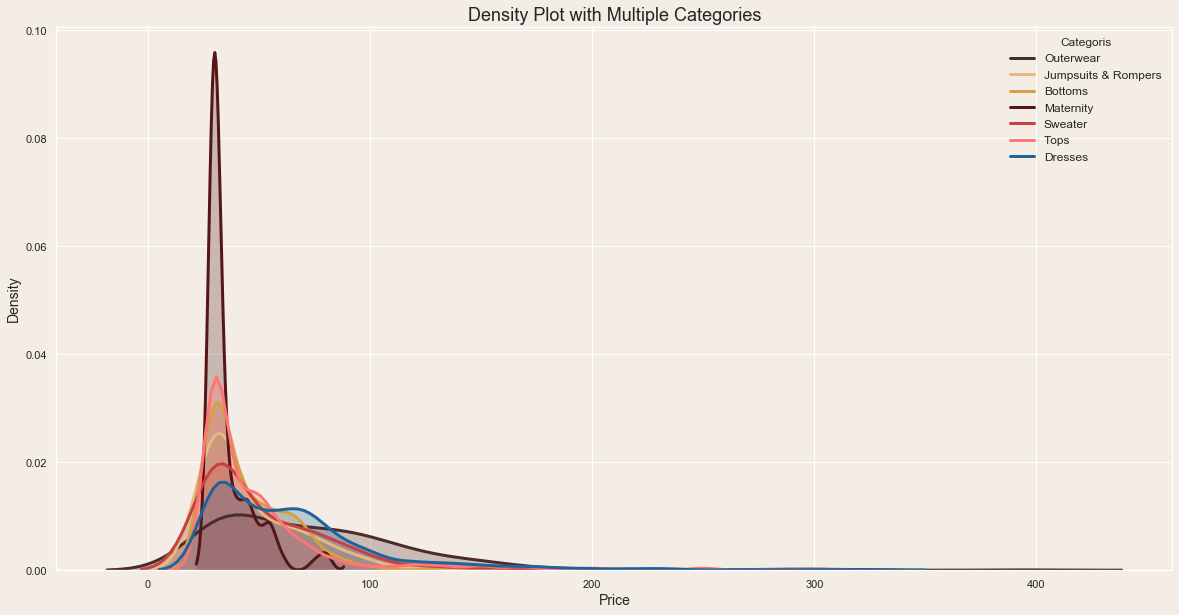

In [209]:
# Density Plot of Price by eatch category
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
categories = ['Outerwear', 'Jumpsuits & Rompers', 'Bottoms', 'Maternity', 'Sweater', 'Tops', 'Dresses']
colors = ['#4a2c2a','#e0bb82','#d2a146', '#541616', '#c64242', '#ff7474', '#20639B']

# Iterate through the three catogories
plt.figure(figsize=(20,10))

for i in range(0, len(categories)):
    # Subset to the category
    subset = rent[rent['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(subset['price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    
# sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
plt.legend(prop={'size': 12}, title = 'Categoris')
plt.title('Density Plot with Multiple Categories',fontdict = {'fontsize' : 18})
plt.xlabel('Price', fontdict = {'fontsize' : 14})
plt.ylabel('Density', fontdict = {'fontsize' : 14})

(0, 70)

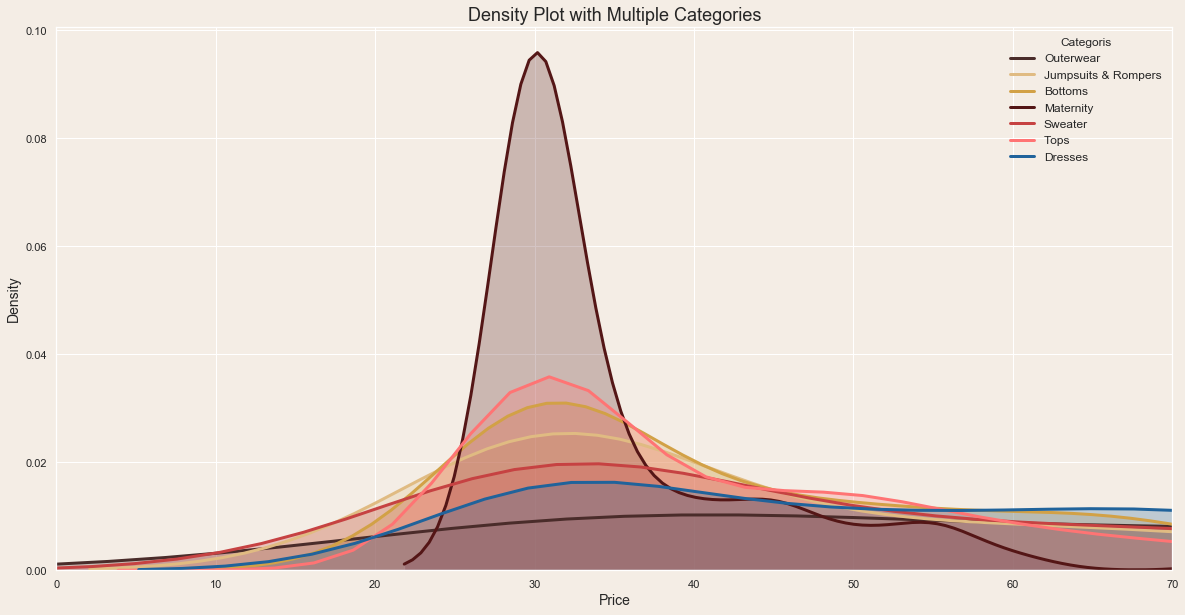

In [210]:
# Density Plot of Price by eatch category
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
categories = ['Outerwear', 'Jumpsuits & Rompers', 'Bottoms', 'Maternity', 'Sweater', 'Tops', 'Dresses']
colors = ['#4a2c2a','#e0bb82','#d2a146', '#541616', '#c64242', '#ff7474', '#20639B']

# Iterate through the three catogories
plt.figure(figsize=(20,10))

for i in range(0, len(categories)):
    # Subset to the category
    subset = rent[rent['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(subset['price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    
# sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
plt.legend(prop={'size': 12}, title = 'Categoris')
plt.title('Density Plot with Multiple Categories',fontdict = {'fontsize' : 18})
plt.xlabel('Price', fontdict = {'fontsize' : 14})
plt.ylabel('Density', fontdict = {'fontsize' : 14})
plt.xlim(0, 70)

Text(0, 0.5, 'Density')

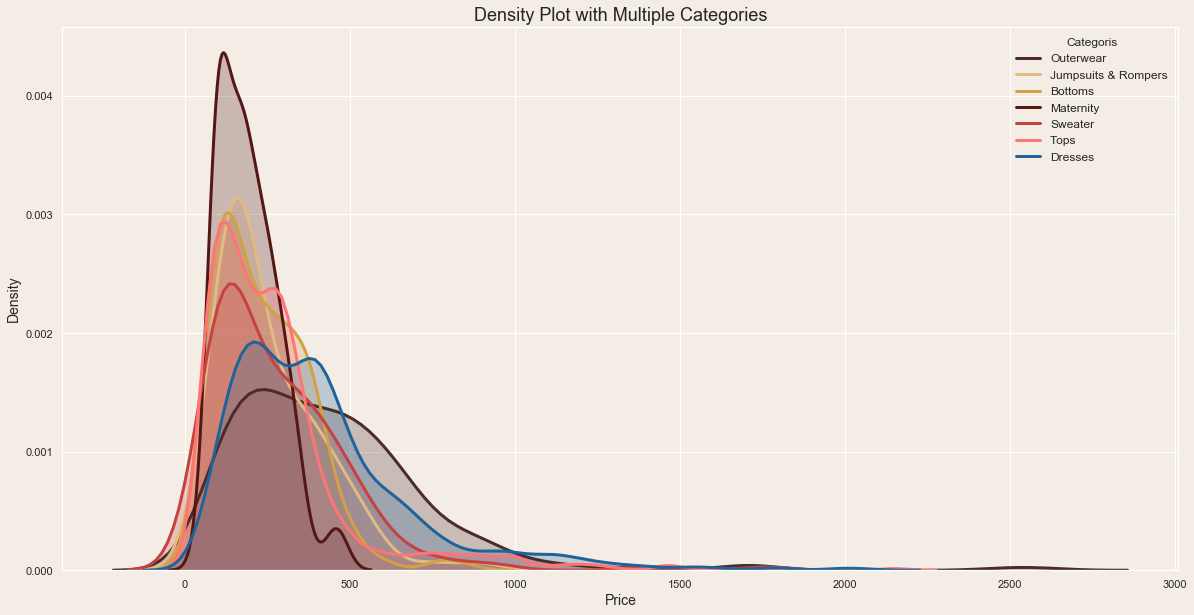

In [256]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
categories = ['Outerwear', 'Jumpsuits & Rompers', 'Bottoms', 'Maternity', 'Sweater', 'Tops', 'Dresses']
colors = ['#4a2c2a','#e0bb82','#d2a146', '#541616', '#c64242', '#ff7474', '#20639B']

# Iterate through the three catogories
plt.figure(figsize=(20,10))

for i in range(0, len(categories)):
    # Subset to the category
    subset = rent[rent['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(subset['original_price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    
# sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
plt.legend(prop={'size': 12}, title = 'Categoris')
plt.title('Density Plot with Multiple Categories',fontdict = {'fontsize' : 18})
plt.xlabel('Price', fontdict = {'fontsize' : 14})
plt.ylabel('Density', fontdict = {'fontsize' : 14})

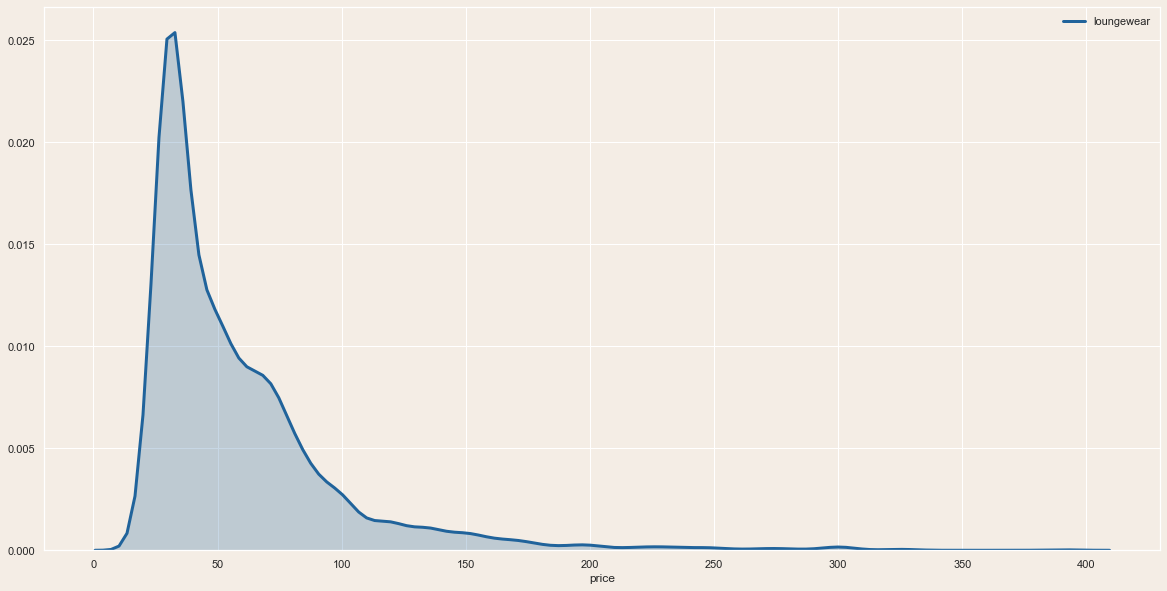

In [262]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
categories = ['loungewear']
colors = ['#20639B']

# Iterate through the three catogories
plt.figure(figsize=(20,10))

for i in range(0, len(categories)):
    # Subset to the category
    subset = lounge[lounge['category_lounge'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(lounge['price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])

In [ ]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
categories = ['loungewear']
colors = ['#20639B']

# Iterate through the three catogories
plt.figure(figsize=(20,10))

for i in range(0, len(categories)):
    # Subset to the category
    subset = rent[rent['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(rent['price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    plt.xlim(0, 2000)

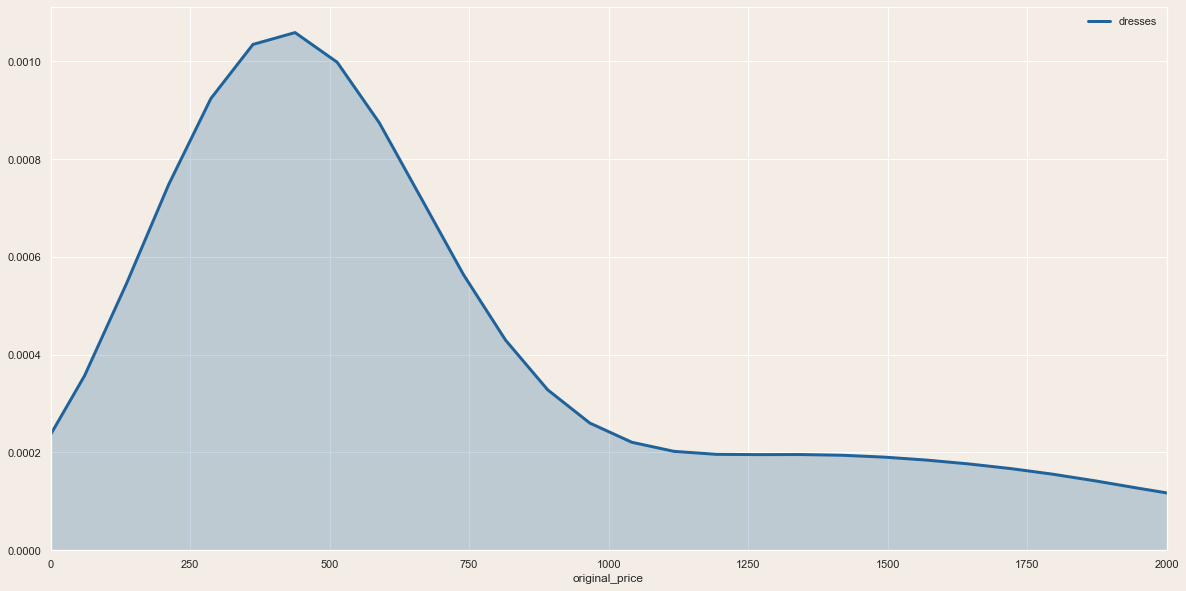

In [237]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
categories = ['dresses']
colors = ['#20639B']

# Iterate through the three catogories
plt.figure(figsize=(20,10))

for i in range(0, len(categories)):
    # Subset to the category
    subset = saks[saks['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(saks['original_price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    plt.xlim(0, 2000)
    

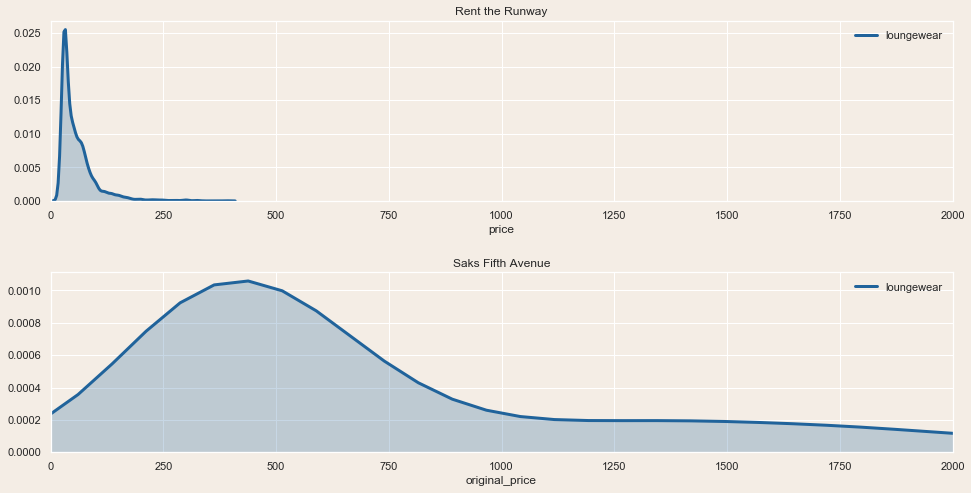

In [283]:
plt.figure(figsize=(14,7))
plt.subplot(2,1,1).set_title("Rent the Runway")
for i in range(0, len(categories)):
    # Subset to the category
    subset = rent[rent['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(rent['price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    plt.xlim(0, 2000)

plt.subplot(2,1,2).set_title("Saks Fifth Avenue")
for i in range(0, len(categories)):
    # Subset to the category
    subset = saks[saks['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(saks['original_price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    plt.xlim(0, 2000)

plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=2.0, rect=[0, 0, 0.95, 0.95])

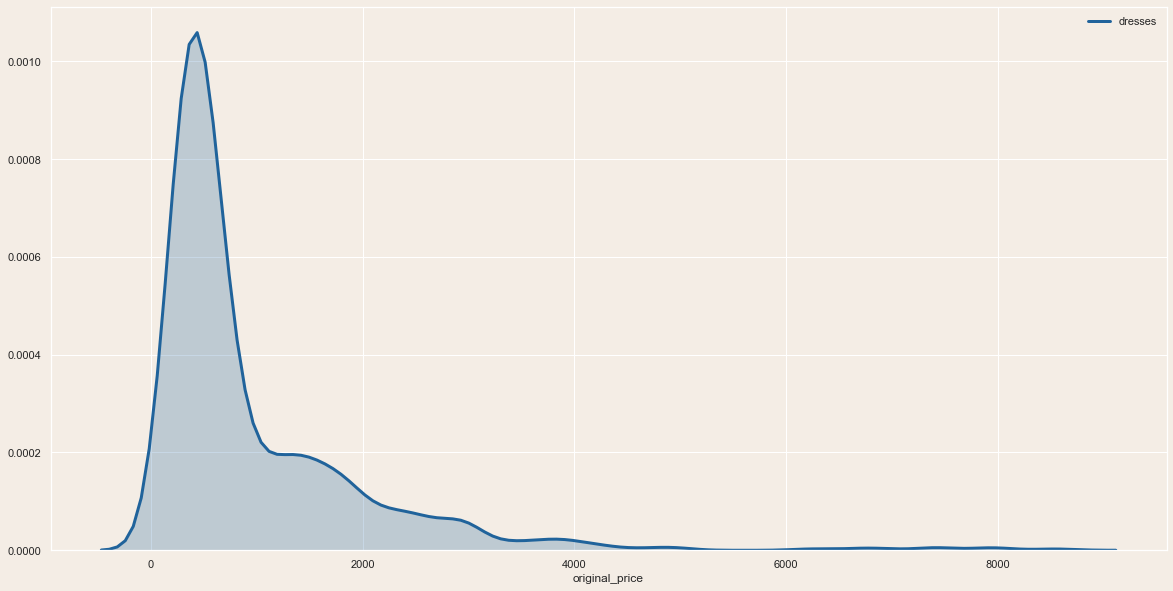

In [239]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
categories = ['dresses']
colors = ['#20639B']

# Iterate through the three catogories
plt.figure(figsize=(20,10))

for i in range(0, len(categories)):
    # Subset to the category
    subset = rent[rent['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(saks['original_price'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    

(10, 30)

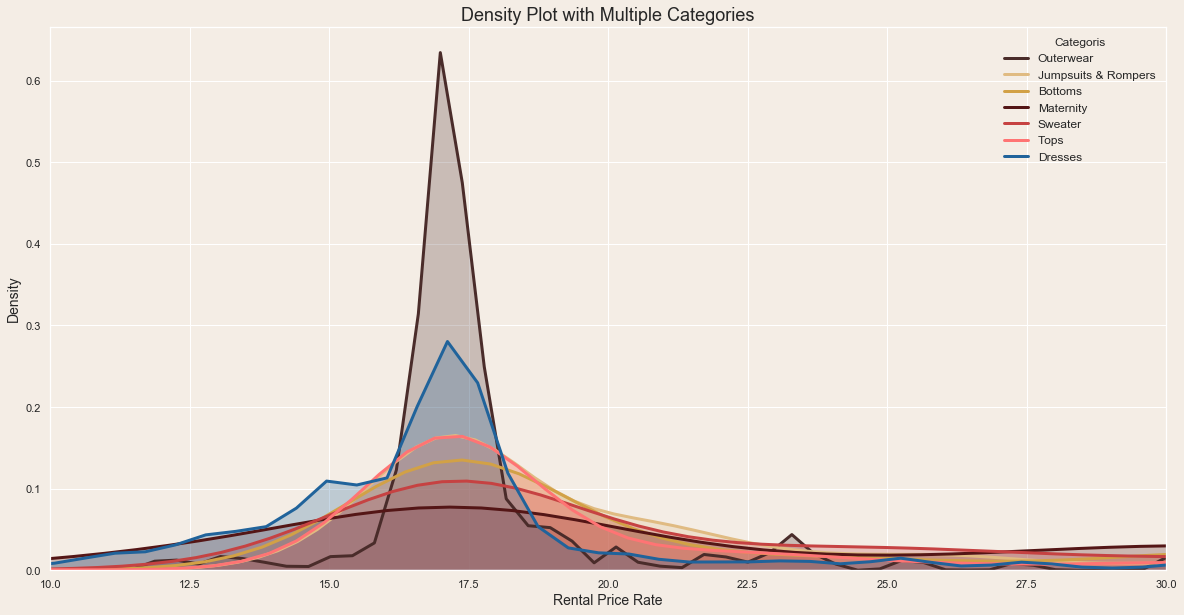

In [212]:
# Density Plot of rental_price_rate by eatch category
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
categories = ['Outerwear', 'Jumpsuits & Rompers', 'Bottoms', 'Maternity', 'Sweater', 'Tops', 'Dresses']
colors = ['#4a2c2a','#e0bb82','#d2a146', '#541616', '#c64242', '#ff7474', '#20639B']

# Iterate through the three catogories
plt.figure(figsize=(20,10))

for i in range(0, len(categories)):
    # Subset to the category
    subset = rent[rent['category'] == categories[i]]
    
    # Draw the density plot
    sns.distplot(subset['rental_price_rate'], hist = False, kde = True,
                 kde_kws = {'shade':True,'linewidth': 3},
                 color = colors[i],
                 label = categories[i])
    
# sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
plt.legend(prop={'size': 12}, title = 'Categoris')
plt.title('Density Plot with Multiple Categories',fontdict = {'fontsize' : 18})
plt.xlabel('Rental Price Rate', fontdict = {'fontsize' : 14})
plt.ylabel('Density', fontdict = {'fontsize' : 14})
plt.xlim(10, 30)

In [ ]:
plt.figure(figsize = (14,9))
sns.regplot(x = rent.MPI, y = loans_mpi_by_country.total_number_loans, fit_reg = False)
plt.title('Total Loan Requested VS National MPI')
plt.show()

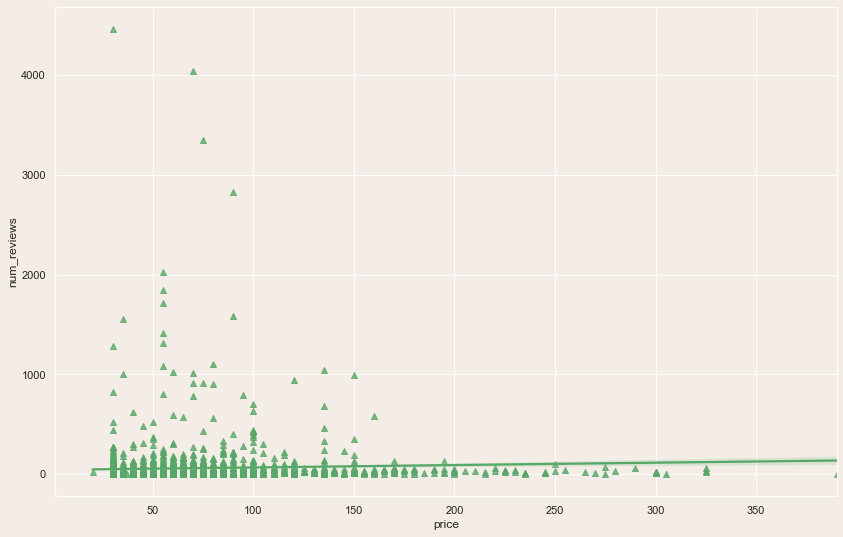

<Figure size 432x288 with 0 Axes>

In [246]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
plt.figure(figsize = (14,9))


sns.regplot(data=rent,
            y='num_reviews',
            x="price",
            marker='^',
            color='g')
plt.show()
plt.clf()

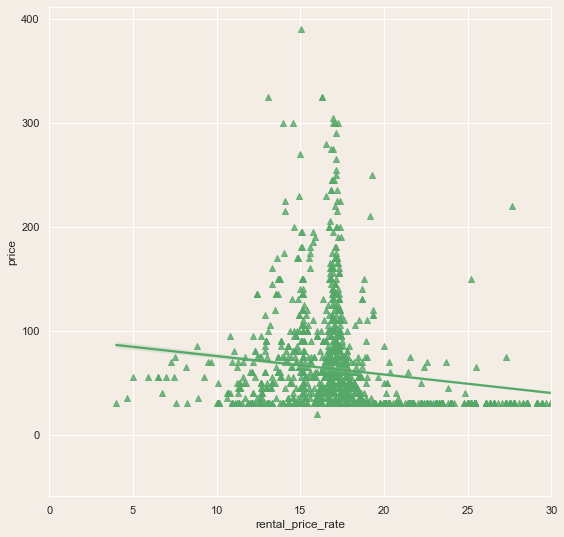

<Figure size 432x288 with 0 Axes>

In [276]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
plt.figure(figsize = (9,9))


sns.regplot(data=rent,
            y='price',
            x="rental_price_rate",
            marker='^',
            color='g')
plt.xlim(0, 30)
plt.show()
plt.clf()

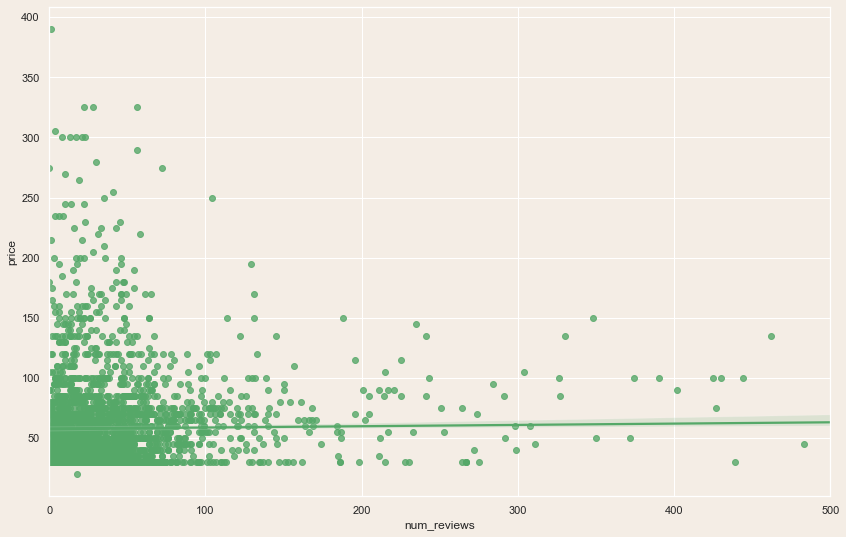

<Figure size 432x288 with 0 Axes>

In [280]:
# Display the residual plot
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
plt.figure(figsize = (14,9))
sns.regplot(data=rent,
              y='price',
              x="num_reviews",
              color='g')
plt.xlim(0, 500)
plt.show()
plt.clf()

Text(0, 0.5, 'Price ($)')

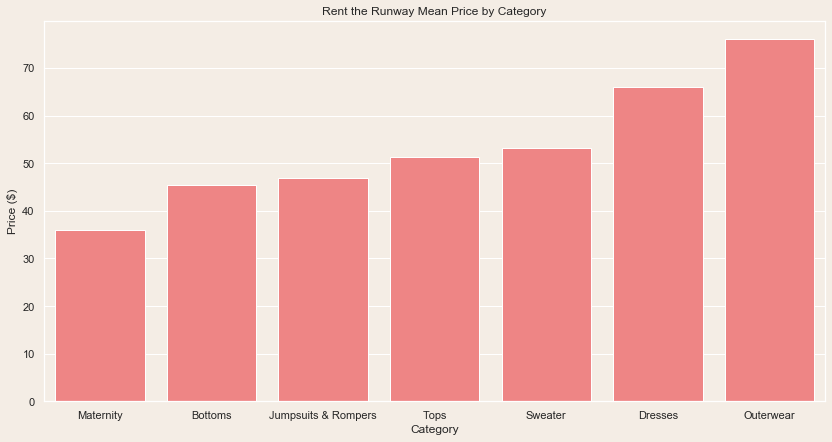

In [216]:
# Mean Price by Category
# cat_mean
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
plt.figure(figsize = (14, 7))
sns.barplot(x = 'category', y='price', data = cat_mean,
            order=cat_mean.sort_values('price').category,
            color = '#ff7474').set_title("Rent the Runway Mean Price by Category")
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Category')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Rental Price Rate')

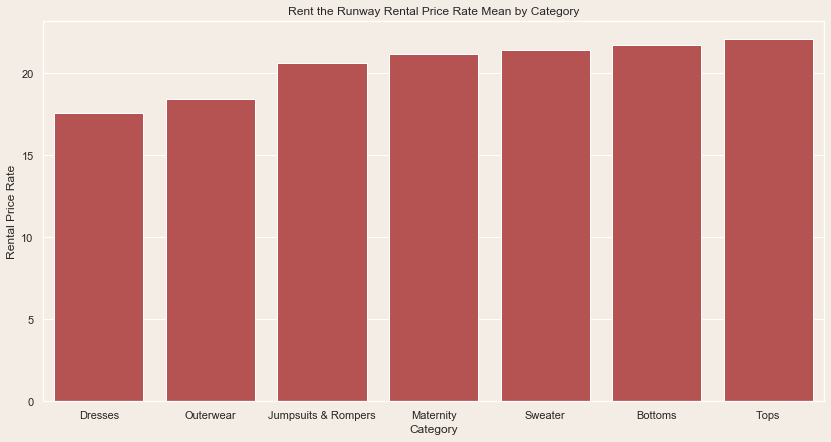

In [217]:
# rent_price_rate_cat_df
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
plt.figure(figsize = (14, 7))
sns.barplot(x = 'category', y='rental_price_rate', data = rent_price_rate_cat_df,
            order=rent_price_rate_cat_df.sort_values('rental_price_rate').category,
            color = '#c64242').set_title("Rent the Runway Rental Price Rate Mean by Category")
sns.plotting_context('notebook', font_scale = 1.2)
plt.xlabel('Category')
plt.ylabel('Rental Price Rate')

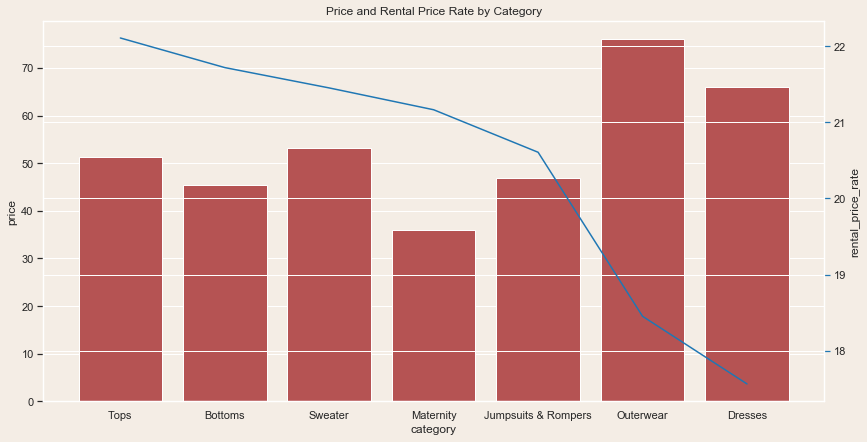

In [219]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
fig, ax1 = plt.subplots(figsize=(14,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('Price and Rental Price Rate by Category', fontsize=12)
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1 = sns.barplot(x='category', y='price', data = cat_df, color = '#c64242')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('Rental Price Rate', fontsize=12)
ax2 = sns.lineplot(x='category', y='rental_price_rate', data = cat_df, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [269]:
cat_df = pd.merge(rent_price_rate_cat_df, cat_mean, how='inner', on ='category')
cat_df2 = pd.merge(brand_pop2, cat_df, how = 'inner', on = 'category')
cat_df2

,category,num_reviews,rental_price_rate,price
0,Bottoms,23.621622,21.717207,45.360360
1,Dresses,104.352775,17.566068,65.923801
2,Jumpsuits & Rompers,33.557692,20.605865,46.826923
3,Maternity,18.247475,21.163687,36.035354
4,Outerwear,25.235110,18.453448,76.112853
5,Sweater,30.185185,21.450106,53.201058
6,Tops,27.125000,22.105633,51.288580


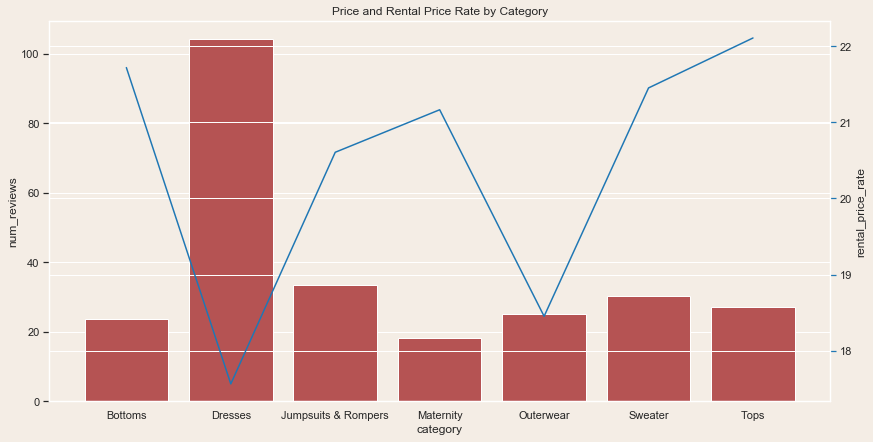

In [272]:
sns.set(rc={'axes.facecolor':'#f4ede5', 'figure.facecolor':'#f4ede5'})
fig, ax1 = plt.subplots(figsize=(14,7))
color = 'tab:green'
#bar plot creation
ax1.set_title('Price and Rental Price Rate by Category', fontsize=12)
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('num_reviews', fontsize=12)
ax1 = sns.barplot(x='category', y='num_reviews', data = cat_df2, color = '#c64242')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('Rental Price Rate', fontsize=12)
ax2 = sns.lineplot(x='category', y='rental_price_rate', data = cat_df2, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

#### 6. Conclusion